In [67]:
import pandas as pd
import csv
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import geopandas as gpd 
import folium


In [68]:
income_df = pd.read_csv("../data/raw/2021Census_G02_VIC_SA2.csv")


In [69]:
income_df = income_df[['SA2_CODE_2021','Median_tot_prsnl_inc_weekly','Median_rent_weekly', 'Median_tot_fam_inc_weekly', 'Median_tot_hhd_inc_weekly' ]]

In [70]:
pop_dfA = pd.read_csv("../data/raw/2021Census_G17A_VIC_SA2.csv")
pop_dfB = pd.read_csv("../data/raw/2021Census_G17B_VIC_SA2.csv")
#pop_dfC = pd.read_csv("2021Census_G17C_VIC_SA2.csv")

In [71]:
pop_dfA = pop_dfA[['SA2_CODE_2021','M_Tot_Tot', 'M_PI_NS_ns_Tot']]

In [72]:
pop_dfB = pop_dfB[['SA2_CODE_2021','F_Tot_Tot', 'F_PI_NS_ns_Tot']]

In [73]:
from functools import reduce
dfs = [pop_dfA, pop_dfB]
population_df = reduce(lambda left,right: pd.merge(left,right,on='SA2_CODE_2021'), dfs)

In [74]:
population_df = population_df.rename({'M_Tot_Tot': 'Male Total', 'M_PI_NS_ns_Tot': 'Male NotStated Total' ,
                           'F_Tot_Tot': 'Female Total', 'F_PI_NS_ns_Tot': 'Female NotStated Total', 
                           }, axis=1)

population_df['total_population'] = population_df['Male Total']+population_df['Male NotStated Total']+population_df['Female Total']+population_df['Female NotStated Total']

In [75]:

population_df=population_df.drop(columns=['Male Total','Male NotStated Total' ,'Female Total', 'Female NotStated Total'])
population_df

,SA2_CODE_2021,total_population
0,201011001,13320
1,201011002,11092
2,201011005,6041
3,201011006,8898
4,201011007,3457
...,...,...
519,217041478,8883
520,217041479,19400
521,217041480,12151
522,297979799,69


In [76]:
df = pd.merge(income_df, population_df, on='SA2_CODE_2021', how="inner")

In [77]:
df[[ 'Median_tot_prsnl_inc_weekly','Median_rent_weekly','Median_tot_fam_inc_weekly','Median_tot_hhd_inc_weekly',
    'total_population']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population
count,524.00000,524.00000,524.00000,524.00000,524.00000
mean,993.86450,357.07824,2143.92939,1760.53626,10866.83397
std,4011.17449,92.54591,632.75876,529.86991,4986.36391
min,0.00000,0.00000,0.00000,0.00000,0.00000
25%,683.75000,310.00000,1742.50000,1401.00000,7259.50000
50%,793.00000,373.00000,2120.50000,1802.50000,10649.50000
75%,918.25000,410.00000,2455.00000,2102.00000,14173.25000
max,92500.00000,612.00000,7000.00000,7000.00000,24673.00000


In [78]:
# import libraries

import geopandas as gpd 
import folium
australia_sf = gpd.read_file("../data/raw/shapefiles/Statistical_area_level2/SA2_2021_AUST_GDA2020.shp")
australia_sf.head(3)



,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
0,101021007,Braidwood,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,3418.3525,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4..."
1,101021008,Karabar,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,6.9825,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21899 -35.36738, 149.21800 -35.3..."
2,101021009,Queanbeyan,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,4.7620,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3..."


In [79]:
vic_sf = australia_sf[australia_sf['STE_NAME21'] == 'Victoria']
vic_sf



,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
644,201011001,Alfredton,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,52.7109,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5..."
645,201011002,Ballarat,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,12.3787,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5..."
646,201011005,Buninyong,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,51.5855,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.84171 -37.61596, 143.84176 -37.6..."
647,201011006,Delacombe,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,34.1607,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.75050 -37.59119, 143.75044 -37.5..."
648,201011007,Smythes Creek,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,104.7274,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.73296 -37.62333, 143.73263 -37.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,217041478,Moyne - West,0,No change,21704,Warrnambool,217,Warrnambool and South West,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,2037.7626,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"MULTIPOLYGON (((142.00870 -38.41715, 142.00876..."
1164,217041479,Warrnambool - North,0,No change,21704,Warrnambool,217,Warrnambool and South West,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,62.4199,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((142.43668 -38.35544, 142.43658 -38.3..."
1165,217041480,Warrnambool - South,0,No change,21704,Warrnambool,217,Warrnambool and South West,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,120.1957,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((142.45281 -38.39126, 142.45230 -38.3..."
1166,297979799,Migratory - Offshore - Shipping (Vic.),0,No change,29797,Migratory - Offshore - Shipping (Vic.),297,Migratory - Offshore - Shipping (Vic.),29799,Migratory - Offshore - Shipping (Vic.),2,Victoria,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None


array([[<AxesSubplot:title={'center':'SA2_CODE_2021'}>,
        <AxesSubplot:title={'center':'Median_tot_prsnl_inc_weekly'}>],
       [<AxesSubplot:title={'center':'Median_rent_weekly'}>,
        <AxesSubplot:title={'center':'Median_tot_fam_inc_weekly'}>],
       [<AxesSubplot:title={'center':'Median_tot_hhd_inc_weekly'}>,
        <AxesSubplot:title={'center':'total_population'}>]], dtype=object)

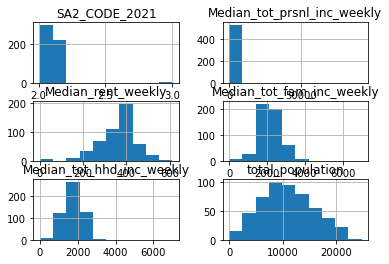

In [80]:
df.hist()

In [81]:
df_zero_vals = df[(df['Median_tot_prsnl_inc_weekly'] == 0) | (df['Median_rent_weekly'] == 0)|
        (df['Median_tot_fam_inc_weekly'] == 0)|
        (df['Median_tot_hhd_inc_weekly'] == 0)| (df['total_population'] == 0)]

df_zero_vals

,SA2_CODE_2021,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population
85,205021080,0,0,0,0,0
88,205021083,0,0,0,0,0
134,206041127,0,0,0,0,0
139,206041507,92500,0,7000,7000,0
214,208031192,0,486,0,0,22
261,210011227,1125,0,0,0,14
522,297979799,2200,0,0,0,69
523,299999499,0,0,0,0,11082


In [82]:
zero_vals_areas = vic_sf[(vic_sf['SA2_CODE21'] == '206041507') | (vic_sf['SA2_CODE21'] == '208031192')|
        (vic_sf['SA2_CODE21'] == '210011227')|
        (vic_sf['SA2_CODE21'] =='297979799')| (vic_sf['SA2_CODE21'] == '299999499')]

zero_vals_areas


,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
783,206041507,Royal Botanic Gardens Victoria,1,New,20604,Melbourne City,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,1.3511,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((144.97665 -37.82318, 144.97743 -37.8..."
858,208031192,Moorabbin Airport,0,No change,20803,Kingston,208,Melbourne - Inner South,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,3.0755,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((145.09093 -37.97992, 145.09050 -37.9..."
905,210011227,Essendon Airport,0,No change,21001,Keilor,210,Melbourne - North West,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,3.3549,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((144.89033 -37.72955, 144.89064 -37.7..."
1166,297979799,Migratory - Offshore - Shipping (Vic.),0,No change,29797,Migratory - Offshore - Shipping (Vic.),297,Migratory - Offshore - Shipping (Vic.),29799,Migratory - Offshore - Shipping (Vic.),2,Victoria,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None
1167,299999499,No usual address (Vic.),0,No change,29999,No usual address (Vic.),299,No usual address (Vic.),29499,No usual address (Vic.),2,Victoria,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None


In [83]:
df['Median_tot_prsnl_inc_weekly'].nsmallest(n=10)

85       0
88       0
134      0
214      0
523      0
284    437
287    442
93     444
297    446
398    482
Name: Median_tot_prsnl_inc_weekly, dtype: int64

In [84]:
df = df[(df['Median_tot_prsnl_inc_weekly'] > 0) & (df['Median_rent_weekly'] > 0)&
        (df['Median_tot_fam_inc_weekly'] > 0) &
        (df['Median_tot_hhd_inc_weekly'] > 0)& (df['total_population'] > 0)] 

In [85]:
df['Median_tot_prsnl_inc_weekly'].nsmallest(n=10)

284    437
287    442
93     444
297    446
398    482
400    485
283    492
18     494
399    495
50     499
Name: Median_tot_prsnl_inc_weekly, dtype: int64

In [86]:
df[[ 'Median_tot_prsnl_inc_weekly','Median_rent_weekly','Median_tot_fam_inc_weekly','Median_tot_hhd_inc_weekly',
    'total_population']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population
count,516.00000,516.00000,516.00000,516.00000,516.00000
mean,823.56589,361.67248,2163.60271,1774.26550,11013.63178
std,197.41497,83.13418,545.84838,435.31694,4860.83509
min,437.00000,20.00000,1050.00000,699.00000,13.00000
25%,687.75000,318.75000,1760.25000,1407.75000,7417.75000
50%,794.50000,375.00000,2125.50000,1810.50000,10777.50000
75%,918.00000,410.00000,2455.25000,2102.25000,14201.25000
max,1532.00000,612.00000,3904.00000,2914.00000,24673.00000


# Removing outliers 

In [87]:
df = df[(df['Median_tot_fam_inc_weekly'] > 1050 - ((2455-1780.50)*1.5)) &
        (df['Median_tot_fam_inc_weekly'] <= 2455.00 + ((2455-1780.50)*1.5))]

In [88]:
df = df[(df['Median_rent_weekly'] > 318.75 - ((410-318)*1.5)) & 
        (df['Median_rent_weekly'] <= 410.00 + ((410-318)*1.5))]

In [89]:
df = df[(df['Median_tot_prsnl_inc_weekly'] > 688.25 - ((917.50-688.250)*1.5)) &
        (df['Median_tot_prsnl_inc_weekly'] <= 917.50 + ((917.50-688.250)*1.5))]

In [90]:
df2 = df[(df['total_population'] < 1000)]
df2

,SA2_CODE_2021,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population
65,204011061,540,260,1375,900,224
93,205031088,444,346,1050,1014,135
206,208031184,900,504,2250,933,34


In [91]:
df = df[(df['total_population'] > 1000 ) &
        (df['total_population'] <= 14329 +  ((14329-7595)*1.5))]

In [92]:
df[[ 'Median_tot_prsnl_inc_weekly','Median_rent_weekly','Median_tot_fam_inc_weekly','Median_tot_hhd_inc_weekly',
    'total_population']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population
count,471.00000,471.00000,471.00000,471.00000,471.00000
mean,801.86412,361.26752,2115.53079,1763.67091,11228.29299
std,163.19444,71.90298,474.28766,408.20040,4665.94291
min,437.00000,182.00000,1220.00000,876.00000,2219.00000
25%,686.00000,320.00000,1766.00000,1429.00000,7631.00000
50%,786.00000,371.00000,2104.00000,1800.00000,10950.00000
75%,897.50000,401.00000,2395.00000,2081.00000,14378.00000
max,1247.00000,541.00000,3422.00000,2831.00000,22318.00000


array([[<AxesSubplot:title={'center':'SA2_CODE_2021'}>,
        <AxesSubplot:title={'center':'Median_tot_prsnl_inc_weekly'}>],
       [<AxesSubplot:title={'center':'Median_rent_weekly'}>,
        <AxesSubplot:title={'center':'Median_tot_fam_inc_weekly'}>],
       [<AxesSubplot:title={'center':'Median_tot_hhd_inc_weekly'}>,
        <AxesSubplot:title={'center':'total_population'}>]], dtype=object)

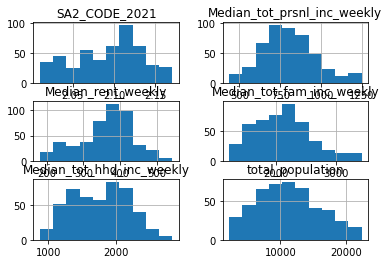

In [93]:
df.hist()

In [94]:
df.dtypes

SA2_CODE_2021                  int64
Median_tot_prsnl_inc_weekly    int64
Median_rent_weekly             int64
Median_tot_fam_inc_weekly      int64
Median_tot_hhd_inc_weekly      int64
total_population               int64
dtype: object

In [95]:
max_Pop = df.sort_values(by = 'total_population',ascending=False)
max_Pop.head(5)


,SA2_CODE_2021,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population
177,207021157,721,450,1957,1595,22318
447,213051583,830,380,2127,2164,21648
468,214021384,621,350,1513,1155,21636
456,214011371,765,335,1941,1383,21532
184,207031163,682,391,1914,1441,21474


In [96]:
max_Pop.tail(5)


,SA2_CODE_2021,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population
235,209031210,898,420,2402,2168,2949
74,204031070,752,260,1915,1493,2889
273,210031439,923,423,2577,2162,2607
499,216021412,666,210,1579,1361,2588
429,213041573,1107,380,2687,2562,2219


In [97]:
vic_sf['SA2_CODE21']=vic_sf['SA2_CODE21'].astype(int)

/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [98]:
df = df \
    .merge(vic_sf[['SA2_CODE21', 'geometry', 'SA2_NAME21']], left_on='SA2_CODE_2021', right_on='SA2_CODE21') \
    .drop('SA2_CODE21', axis=1)

df.head()

,SA2_CODE_2021,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population,geometry,SA2_NAME21
0,201011001,865,370,2218,1952,13320,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",Alfredton
1,201011002,842,313,2276,1573,11092,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",Ballarat
2,201011005,805,330,2270,1927,6041,"POLYGON ((143.84171 -37.61596, 143.84176 -37.6...",Buninyong
3,201011006,775,360,1855,1627,8898,"POLYGON ((143.75050 -37.59119, 143.75044 -37.5...",Delacombe
4,201011007,802,350,2236,2065,3457,"POLYGON ((143.73296 -37.62333, 143.73263 -37.6...",Smythes Creek


In [99]:
#sorted_prsnl_inc = df.sort_values('Median_tot_prsnl_inc_weekly', ascending = 'False')
sorted_prsnl_inc = df.sort_values(by = 'Median_tot_prsnl_inc_weekly',ascending=False)
sorted_prsnl_inc['centroid'] = sorted_prsnl_inc['geometry'].apply(lambda x: (x.centroid.y, x.centroid.x))


In [100]:
sorted_prsnl_inc = sorted_prsnl_inc.head(5)
sorted_prsnl_inc

,SA2_CODE_2021,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population,geometry,SA2_NAME21,centroid
378,213031352,1247,462,3216,2483,13072,"POLYGON ((144.85915 -37.81764, 144.85984 -37.8...",Yarraville,"(-37.81796298509081, 144.88197768663372)"
121,206041121,1246,416,3063,2216,9603,"POLYGON ((144.92172 -37.78987, 144.92243 -37.7...",Kensington (Vic.),"(-37.79431842246614, 144.92707364215434)"
103,206011106,1244,421,2834,2087,12025,"POLYGON ((144.97307 -37.76386, 144.97340 -37.7...",Brunswick East,"(-37.768890269091365, 144.97767359622273)"
134,206071143,1241,481,3207,2300,11795,"POLYGON ((144.97795 -37.78108, 144.97812 -37.7...",Fitzroy North,"(-37.784064976710724, 144.98430874517808)"
370,213021344,1240,460,3213,2555,15452,"POLYGON ((144.86014 -37.82487, 144.85809 -37.8...",Newport,"(-37.83761490911122, 144.88222759744983)"


In [101]:
geoJSON = vic_sf[['SA2_NAME21', 'geometry']].drop_duplicates('SA2_NAME21').to_json()

In [102]:
m = folium.Map(location=[-37.78, 145.29], tiles="Stamen Terrain", zoom_start=10, preferCanvas=True)

m

import folium

m = folium.Map(location=[-37.78, 145.29], tiles="Stamen Terrain", zoom_start=10, preferCanvas=True)


m.add_child(folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
))

#_map.save('../../plots/foliumChoroplethMap.html')
m


In [103]:


for i in range(0, len(sorted_prsnl_inc)):
    folium.Marker(
      location=sorted_prsnl_inc.iloc[i]['centroid'],
      popup=sorted_prsnl_inc.iloc[i]['SA2_NAME21'],
      radius=10,
      color='red',
      fill=True,
      fill_color='red'
   ).add_to(m)
m.save('../plots/map_max_median_income.html')
m

In [104]:

sorted_pop = max_Pop.head(5)
sorted_pop = sorted_pop \
    .merge(vic_sf[['SA2_CODE21', 'geometry', 'SA2_NAME21']], left_on='SA2_CODE_2021', right_on='SA2_CODE21') \
    .drop('SA2_CODE21', axis=1)

sorted_pop['centroid'] = sorted_pop['geometry'].apply(lambda x: (x.centroid.y, x.centroid.x))

#add markers for ares with maz pop



In [105]:
for i in range(0, len(sorted_pop)):
    folium.Marker(
      location=sorted_pop.iloc[i]['centroid'],
      popup=sorted_pop.iloc[i]['SA2_NAME21'],
      radius=10,
      color='red',
      fill=True,
      fill_color='red'
   ).add_to(m)
m.save('../plots/map_highest_population.html')
m

In [111]:
rent_weekly_ = df.sort_values(by = 'Median_rent_weekly',ascending=False)


In [118]:
rent_weekly = rent_weekly_.head(10)
rent_summary = rent_weekly[['SA2_NAME21','Median_rent_weekly']] 
rent_summary

,SA2_NAME21,Median_rent_weekly
133,Carlton North - Princes Hill,541
342,Keysborough - South,520
146,Templestowe,513
424,Mount Eliza,512
170,Aspendale Gardens - Waterways,510
168,Bentleigh East - North,508
142,Kew - South,501
54,Torquay,500
344,Glen Waverley - East,500
148,Doncaster East - North,497


In [126]:
rent_weekly

,SA2_CODE_2021,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population,geometry_x,SA2_NAME21_x,geometry_y,SA2_NAME21_y
0,206071140,1197,541,3081,2355,7601,"POLYGON ((144.95940 -37.78471, 144.95955 -37.7...",Carlton North - Princes Hill,"POLYGON ((144.95940 -37.78471, 144.95955 -37.7...",Carlton North - Princes Hill
1,212041566,890,520,2455,2493,12150,"POLYGON ((145.14435 -37.99260, 145.14466 -37.9...",Keysborough - South,"POLYGON ((145.14435 -37.99260, 145.14466 -37.9...",Keysborough - South
2,207021159,781,513,2419,2163,15071,"POLYGON ((145.12200 -37.75598, 145.12197 -37.7...",Templestowe,"POLYGON ((145.12200 -37.75598, 145.12197 -37.7...",Templestowe
3,214021381,966,512,2956,2547,15702,"POLYGON ((145.07201 -38.18708, 145.07217 -38.1...",Mount Eliza,"POLYGON ((145.07201 -38.18708, 145.07217 -38.1...",Mount Eliza
4,208031183,846,510,2549,2348,7476,"POLYGON ((145.10360 -38.01621, 145.10306 -38.0...",Aspendale Gardens - Waterways,"POLYGON ((145.10360 -38.01621, 145.10306 -38.0...",Aspendale Gardens - Waterways
5,208021426,919,508,2656,2250,13552,"POLYGON ((145.05248 -37.91107, 145.05260 -37.9...",Bentleigh East - North,"POLYGON ((145.05248 -37.91107, 145.05260 -37.9...",Bentleigh East - North
6,207011521,1104,501,3364,2577,10299,"POLYGON ((145.03357 -37.80578, 145.03452 -37.8...",Kew - South,"POLYGON ((145.03357 -37.80578, 145.03452 -37.8...",Kew - South
7,203031053,1001,500,2627,2281,20404,"POLYGON ((144.28343 -38.31077, 144.28555 -38.2...",Torquay,"POLYGON ((144.28343 -38.31077, 144.28555 -38.2...",Torquay
8,212051321,701,500,2180,1949,18708,"POLYGON ((145.16622 -37.87761, 145.16637 -37.8...",Glen Waverley - East,"POLYGON ((145.16622 -37.87761, 145.16637 -37.8...",Glen Waverley - East
9,207021424,704,497,2158,1934,13507,"POLYGON ((145.16657 -37.76349, 145.16681 -37.7...",Doncaster East - North,"POLYGON ((145.16657 -37.76349, 145.16681 -37.7...",Doncaster East - North


In [127]:
rent_weekly = rent_weekly \
    .merge(vic_sf[['SA2_CODE21', 'geometry', 'SA2_NAME21']], left_on='SA2_CODE_2021', right_on='SA2_CODE21') \
    .drop('SA2_CODE21', axis=1)

rent_weekly['centroid'] = rent_weekly['geometry'].apply(lambda x: (x.centroid.y, x.centroid.x))


In [129]:
len(rent_weekly)

10

In [130]:
for i in range(0, len(rent_weekly)):
    folium.Marker(
      location=rent_weekly.iloc[i]['centroid'],
      popup=rent_weekly.iloc[i]['SA2_NAME21'],
      
      color='red',
      fill=True,
      fill_color='red'
   ).add_to(m)
m.save('../plots/max_rent.html')
m

In [44]:

df.to_csv('../data/raw/income_and_pop.csv', index=False)